<a href="https://colab.research.google.com/github/sagihaider/IADS_SummerSchool_NN_2019/blob/master/Day2_1_DL_for_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning for text and sequences

Today we are going to explore deep-learning models that can process text (understood as sequences of word or sequences of characters), timeseries, and sequence data in general. 

The two fundamental deep-learning algorithms for sequence processing:
1. Recurrent neural networks (RNN) 
2. 1D convnets

Applications of these algorithms include the following:

* Document classification and timeseries classification, such as identifying the topic of an article or the author of a book
* Timeseries comparisons, such as estimating how closely related two documents or two stock tickers are
* Sequence-to-sequence learning, such as decoding an English sentence into French
* Sentiment analysis, such as classifying the sentiment of tweets or movie reviews as positive or negative
* Timeseries forecasting, such as predicting the future weather at a certain location, given recent weather data

Today, we are going to explore two examples: 

1. Sentiment anlysis on the IMDB data
2. Temperature forcasting

#### Keep in mind throughout this chapter that none of these deeplearning models truly understand text in a human sense; rather, these models can map the statistical structure of written language, which is sufficient to solve many simple textual tasks. 

Like all other neural networks, deep-learning models don’t take as input raw text: they only work with numeric tensors. 
Vectorizing text is the process of transforming text into numeric tensors. This can be done in multiple ways:

* Segment text into words, and transform each word into a vector.
* Segment text into characters, and transform each character into a vector.
* Extract `n-grams` of words or characters, and transform each` n-gram` into a vector. `N-grams` are overlapping groups of multiple consecutive words or characters. 

***The different units into which you can break down text (words, characters, or n-grams) are called tokens, and breaking text into such tokens is called tokenization.***

Note: All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens.

In [6]:

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Images
!pwd


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Images
/gdrive/My Drive/Images


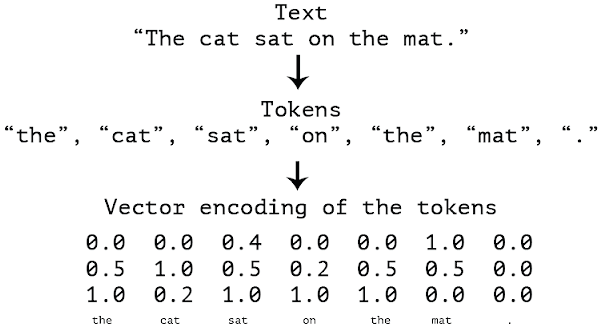

In [10]:
from IPython.display import Image
Image('text2vec.png', width=430, height=300)

There are multiple ways to associate a vector with a token. We will see two major ones: 

1. One-hot encoding of tokens
2. Token embedding (typically used exclusively for words, and called word embedding).

#### Why we are studying these techniques? 
We want to see how to convert raw text to a Numpy tensor that you can send to a Keras network.


### One-hot encoding of words and characters

One-hot encoding is the most common, most basic way to turn a token into a vector. 
It consists of associating a unique integer index with every word and then turning this integer index `i` into a binary vector of size `N` (the size of the vocabulary); the vector is all zeros except for the i th entry, which is 1.

**Note**: Of course, one-hot encoding can be done at the character level, as well. We are going to look two examples (i) word level and (ii) character level

In [14]:
# Word-level one-hot encoding (toy example)

import numpy as np

# Initial data: one entry per sample (in this example, a sample is a sentence, but it could be an entire document)
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 

# Builds an index of all tokens in the data
token_index = {}

for sample in samples:
  for word in sample.split(): # Tokenizes the samples via the split method. In real life, you’d also strip punctuation and special characters from the samples.
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      
  max_length = 10
   
  results = np.zeros(shape=(len(samples),
                              max_length,
                              max(token_index.values()) + 1))
  for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
      index = token_index.get(word)
      results[i, j, index] = 1.

The cat sat on the mat.
The dog ate my homework.


In [13]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [0]:
# Character-level one-hot encoding (toy example)
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [16]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### Using Keras for word-level one-hot encoding

In [18]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(word_index)

Found 9 unique tokens.
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


### Word Embeddings

Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called **word embeddings**. 

* The vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary)

* Word embeddings are lowdimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors)

* Unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data. It’s common to see word embeddings that are
256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. 

* So, word embeddings pack more information into far fewer dimensions.

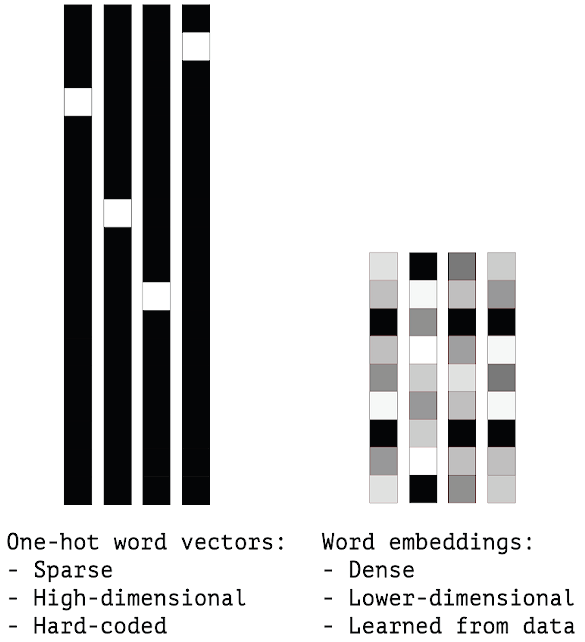

In [20]:
Image('wordemb.png', width=430, height=500)

There are two ways to obtain word embeddings:

1. Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network.

2. Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying to solve. These are called pretrained word embeddings.

### Learning Word Embedding with Embedding Layer


In [21]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# The Embedding layer takes at least two arguments: 
# 1. number of possible tokens (here, 1,000: 1 + maximum word index)
# 2. the dimensionality of the embeddings (here, 64).
# In our example it can embed sequences of variable lengths: for instance, you could feed into the Embedding layer in 
# the previous example batches with shapes (1000, 64) (batch of 32 sequences of length 10)

W0727 14:44:11.607608 140473941309312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



**Note**: This layer returns a 3D floating-point tensor of shape` (samples, sequence_length, embedding_dimensionality)`. Such a 3D tensor can then be processed by an RNN layer or a 1D convolution layer (both will be introduced in the following sections).



In [4]:
# Loading the IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing
import numpy as np

max_features = 10000
maxlen = 20

# This is the trick due to new version
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)

(25000, 20)


In [6]:
# Using an Embedding layer and classifier on the IMDB data

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, 
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


W0727 14:56:44.185909 139982221596544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 14:56:44.199714 139982221596544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 14:56:44.242892 139982221596544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 14:56:44.261650 139982221596544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0727 14:56:44.268490 139982221596544 deprecation.py:323] From /usr/local/lib/python3.6

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 284us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 102us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 104us/step - los